# Linear Regression via Gradient Descent Tutorial

## Coded using naive computation of gradients

In [ ]:
%matplotlib inline

import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt


This notebook shows how to implement linear regression via gradient descent on a set of points in 2D.  

We implement a class called `LinearRegressionModelNaive` to compute the best-fit line.  
That is, this model computes the slope and intercept of the line that best fits the set of input x, y points.  
Best fit is defined as the line such that for the set of input points, the mean of the squared distance of each point to the line in the y direction is minimized. That is, if 

$m = $ number of points  
$w = $ slope  
$b = $ intercept   

And the output of the model for any $x$ is:  
$$\hat{y} = wx + b$$

We want chose $w$ and $b$ to minimize cost $J$:
$$J = \frac{1}{m} \sum_{i=1}^{m} (y - \hat{y})^2$$

The y-squared loss for any particular point is:
$$\mathscr{L} = \frac{1}{2} (y - \hat{y})^2 = \frac{1}{2}(y^2 - 2y\hat{y} + \hat{y}^2)$$

The derivative of $\mathscr{L}$ with respect to $\hat{y}$ is:

$$ \frac{d \mathscr{L}}{d \hat{y}} = \frac{1}{2}(-2y + 2\hat{y}) = \hat{y} - y $$

Then we compute the partials of $\hat{y}$ with respect to $w$ and $b$:
$$\frac{\partial \hat{y}}{\partial w} = x$$
$$\frac{\partial \hat{y}}{\partial b} = 1$$

We then use the chain rule to get what we need: the partials of the loss $\mathscr{L}$ with repect to $w$ and $b$:

$$ \frac{\partial \mathscr{L}}{\partial w} = \frac{d \mathscr{L}}{d \hat{y}} \frac{\partial \hat{y}}{\partial w} = x(\hat{y} - y)$$
$$ \frac{\partial \mathscr{L}}{\partial b} = \frac{d \mathscr{L}}{d \hat{y}} \frac{\partial \hat{y}}{\partial b} = (\hat{y} - y)$$

To compute the gradients with respect to the overall cost $J$ we simply average across the losses for each point in the set:

$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}(\hat{y}^{(i)} - y^{(i)})$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

These gradients point in the direction of increasing cost $J$. So to decrease the cost, we move $w$ and $b$ a small amount in the opposite directions of the gradients. Let:

$\alpha = $ learning rate, typically a small number like $0.001$

We modify $w$ and $b$ with these equations:

$$w = w - \alpha \frac{\partial J}{\partial w}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$

We see this implemented in the __fit()__ function for the `LinearRegressionModelNaive` class below.


### What we want:

After we have trained a model, we want it to have learned a line with slope and intercept very close to the ones you get from the usual formula for the linear regression best-fit line. Here is an example of a set of points and the linear regression best-fit line. We want this:

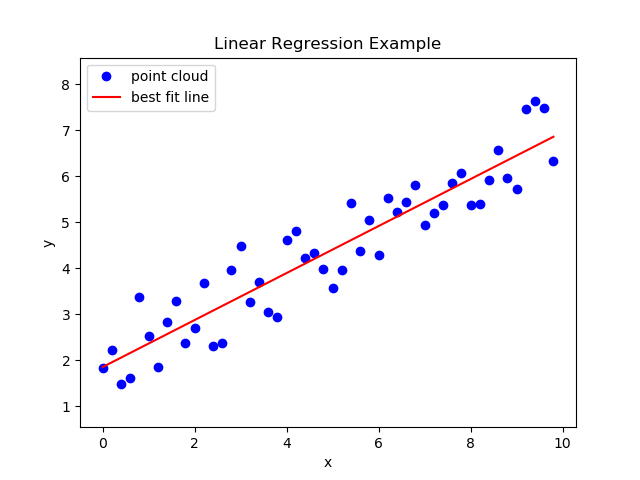

In [ ]:
def read_points_file(fname, delim='\t'):
    """Read x y points from a text file, returning numpy arrays containing the x coordinates and the y coordinates.

    Each line in the text file holds one point. m points total.
    :param fname: Name of file holding x, y coordinates
    :type fname: string
    :param delim: Deliminter between fields in the text file
    :type delim: string (one character)
    :return xs: Array holding x coordinate of points
    :type xs: numpy array of floats of shape (1, m)
    :return ys: Array holding y coordinate of points
    :type ys: numpy array of floats of shape (1, m)
    """
    dat1 = np.loadtxt(fname, delimiter=delim)
    m = dat1.shape[0]
    xs = dat1[:, 0]
    ys = dat1[:, 1]
    return xs, ys

In [ ]:
class LinearRegressionModelNaive:
    """
    Class used to implement linear regression model, naively.

    Attributes
    ----------
    coef_ : linear model coefficients
    intercept_ : linear model intercept

    Methods
    -------
    fit(x, y, nepochs) : compute coefficients of best fit line
    """

    def __init__(self, slope=0.0, intercept=0.0):
        """
        Parameters
        ----------
        slope : float, optional
            Initial value of slope
        intercept : float, optional
            Initial value of intercept
        """

        self.coef_ = np.zeros(1)
        self.coef_[0] = slope
        self.intercept_ = intercept
        self.cost_ = 0.0
        self.r2_score = None
        
    def fit(self, xs, ys, nepochs=10, learnrate=0.01):
        """Computes slope and intercept of best fit line for points.

        Parameters
        ----------
        xs : numpy array of shape (m,) floats where m is the number of points
            The x coordinates of the points
        ys : numpy array of shape (m,) floats
            The y coordinates of the points
        nepochs : int
            Number of training epochs
        learnrate : float
            Learning rate

        Action
        Computes the slope and interecept of the best-fit line for a set of points
        and put those into coef_[0][0] and intercept_ , respectively.
        """

        # A couple checks on the parameters:

        # The xs and ys must be the same length
        assert(xs.shape == ys.shape)
        assert(nepochs > 0)

        w = self.coef_[0]
        b = self.intercept_

        # We'll need the number of points a lot:
        m = xs.shape[0]

        # The mean of the y values will be used for evaluating the model.
        y_mean = ys.mean()

        sys.stderr.write('m: {}\n'.format(m))
        sys.stderr.write('y_mean: {}\n'.format(y_mean))
        sys.stderr.write('Initial w {}    b {}\n'.format(w, b))
        
        # How often to print training stats.
        training_stats_interval = 100
        if nepochs < 210:
            training_stats_interval = 10
        elif nepochs > 40000:
            training_stats_interval = 1000

        t0 = time.perf_counter()

        for epoch in range(nepochs):
            # Compute cost J and gradients at each epoch
            J = 0.0
            dw = 0.0
            db = 0.0

            for i in range(m):
                # Compute activation (or yhat) for x_i using current w and b.
                a = w * xs[i] + b
                # Use mean squared error loss
                J += (ys[i] - a)**2
                dw += xs[i] * (a - ys[i])
                db += (a - ys[i])

            J /= m
            dw /= m
            db /= m

            w -= learnrate * dw
            b -= learnrate * db
            
            if (epoch % training_stats_interval) == 0:
                sys.stderr.write('epoch: {:6d}\tcost: {:8.4f}\tw: {:8.4f}\tb: {:8.4f}\n'.format(epoch, J, w, b))

        t1 = time.perf_counter()
        sys.stderr.write('Train time: {0:10.4f} sec\n'.format(t1 - t0))

        # Evaluations:
        # Compute R^2 metric
        null_model_v = 0.0
        for i in range(m):
            null_model_v += (ys[i] - y_mean)**2

        null_model_v /= m
        self.r2_score = 1.0 - J / null_model_v

        self.coef_[0] = w
        self.intercept_ = b
        self.cost_ = J
        return w, b

## Run the linear regression model

To run the linear regression model we defined above, we:
* Set the values of variables we would have set via the command line.
* Read the x, y points in from the points_filename
* Build and run the linear regression model
* Plot the points and the linear regression model line.

In [ ]:
# Parameters for running the linear regression model
examples_dir = '/Users/jay/github/ml-examples'
data_dir = os.path.join(examples_dir, 'data')
points_basename = 'linpoints50.txt'
points_filename = os.path.join(data_dir, points_basename)

plot_filename = '_regression.png'
nepochs = 501
learnrate = 0.01


In [ ]:
# Read points
xs, ys = read_points_file(points_filename)

print('xs shape: {}'.format(xs.shape))
print('ys shape: {}'.format(ys.shape))

In [ ]:
xs[0:10]

In [ ]:
ys[0:10]

### Compute the best fit linear regression model

For the example set of points shown below, the best-fit line computed using the usual formula has parameters:<br>
$slope = 0.511$<br>
$intercept = 1.856$

In [ ]:
linregmodel = LinearRegressionModelNaive(slope=0.1, intercept=0.1)
slope, b = linregmodel.fit(xs, ys, nepochs=nepochs, learnrate=learnrate)
print('Best fit model: cost {}\tslope: {}\tb: {}'.format(linregmodel.cost_, slope, b))
print('R^2 score: {}'.format(linregmodel.r2_score))

In [ ]:
# Plot the points and the best-fit line

# Build two points to plot the best-fit line
xmin = xs.min()
xmax = xs.max()

x_fit = np.array([xmin, xmax])
y_fit = slope * x_fit + b

# Plot the points and line:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Linear Regression Example')
plt.axis('equal')
plt.plot(xs, ys, 'bo', label='point cloud')
plt.plot(x_fit, y_fit, 'r-', label='best fit line')
plt.legend()
plt.show()
